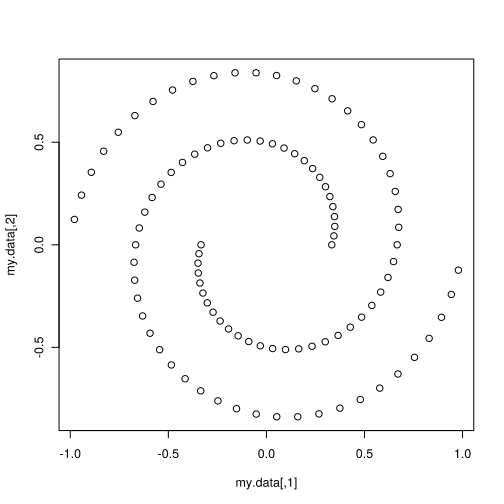

In [21]:
library(mlbench)

set.seed(1)
obj <- mlbench.spirals(100)
my.data <-  obj$x
plot(my.data)

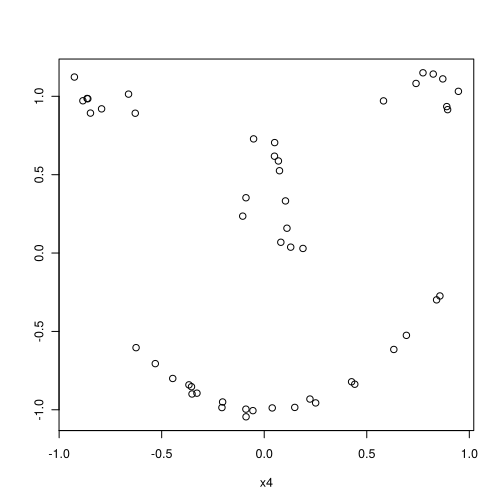

In [32]:
set.seed(5)
obj1 <- mlbench.smiley(n=50, sd1 = 0.1, sd2 = 0.025)
my.data <-  obj1$x
plot(my.data)

Potrebujem matriko, ki doloca, kako blizu sta x in y med seboj. Za mero bom izbral Gaussian Kernel: ce sta dve tocki blizu, je GK ~ 1, ce pa sta dalec narazen pa GK ~ 0.

In [33]:
s <- function(x1, x2, alpha=1) {
    exp(- alpha * norm(as.matrix(x1-x2), type="F")) #frobeniusova norma
}

In [35]:
make.similarity <- function(my.data, similarity, r = 0.4) {
  N <- nrow(my.data)
  S <- matrix(rep(NA,N^2), ncol=N) #ustvarim prazno matriko
  for(i in 1:N) {
    for(j in 1:N) {
        if (norm(as.matrix(my.data[i,]-my.data[j,]), type="F") >= r) {
            S[i,j] <- 0
        } else {
            S[i,j] <- similarity(my.data[i,], my.data[j,])
       }
    }
  }
  S
}

In [36]:
S <- make.similarity(my.data, s)
S[1:10,1:10]

1.0000000,0.7973012,0.8547744,0.9005959,0.7654333,0.9733316,0.9168455,0.9750634,0.0000000,0.0000000
0.7973012,1.0000000,0.7515745,0.8508052,0.8814706,0.8179829,0.8012392,0.8155725,0.0000000,0.0000000
0.8547744,0.7515745,1.0000000,0.7847416,0.6866748,0.8580275,0.7843378,0.8606452,0.0000000,0.0000000
0.9005959,0.8508052,0.7847416,1.0000000,0.8466416,0.9110394,0.9412188,0.9077365,0.0000000,0.0000000
0.7654333,0.8814706,0.6866748,0.8466416,1.0000000,0.7794583,0.8038341,0.7765773,0.0000000,0.0000000
0.9733316,0.8179829,0.8580275,0.9110394,0.7794583,1.0000000,0.9117835,0.9962681,0.0000000,0.0000000
0.9168455,0.8012392,0.7843378,0.9412188,0.8038341,0.9117835,1.0000000,0.9096509,0.0000000,0.0000000
0.9750634,0.8155725,0.8606452,0.9077365,0.7765773,0.9962681,0.9096509,1.0000000,0.0000000,0.0000000
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.8238383
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8238383,1.0000000


Tip grafa: k-najblizjih sosedov, popoln graf (n.neighbor = N )

In [37]:
make.affinity <- function(S, n.neighbors=2) {
  N <- length(S[,1])

  if (n.neighbors >= N) { #poln graf
    A <- S
  } else {
    A <- matrix(rep(0,N^2), ncol=N) #prazna matrika
    for(i in 1:N) {
      best.similarities <- sort(S[i,], decreasing=TRUE)[1:n.neighbors] #povezem tiste, kateri so blizji
      for (s in best.similarities) {
        j <- which(S[i,] == s)
        A[i,j] <- S[i,j]
        A[j,i] <- S[i,j] #simetricna matrika - neusmerjen graf
      }
    }
  }
  A  
}


In [38]:
A <- make.affinity(S, 4)#povezem tiste, ki imajo visoke vrednosti
A[1:8,1:8]

1.0000000,0.0000000,0.8547744,0.0000000,0.0000000,0.9733316,0.9168455,0.9750634
0.0000000,1.0000000,0.0000000,0.8508052,0.8814706,0.8179829,0.0000000,0.0000000
0.8547744,0.0000000,1.0000000,0.0000000,0.0000000,0.8580275,0.0000000,0.8606452
0.0000000,0.8508052,0.0000000,1.0000000,0.8466416,0.9110394,0.9412188,0.9077365
0.0000000,0.8814706,0.0000000,0.8466416,1.0000000,0.0000000,0.8038341,0.0000000
0.9733316,0.8179829,0.8580275,0.9110394,0.0000000,1.0000000,0.9117835,0.9962681
0.9168455,0.0000000,0.0000000,0.9412188,0.8038341,0.9117835,1.0000000,0.9096509
0.9750634,0.0000000,0.8606452,0.9077365,0.0000000,0.9962681,0.9096509,1.0000000


In [39]:
D <- diag(apply(A, 1, sum)) #vsota vrstic
D[1:10,1:10]

4.720015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
0.000000,3.550259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
0.000000,0.000000,3.573447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
0.000000,0.000000,0.000000,5.457442,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
0.000000,0.000000,0.000000,0.000000,3.531946,0.000000,0.000000,0.000000,0.000000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,6.468433,0.000000,0.000000,0.000000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.483333,0.000000,0.000000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.649364,0.000000,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.527748,0.00000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.33576


Poracunam nenormalno Laplaceovo matriko (U = D - A)

In [40]:
U <- D - A
round(U[1:12,1:12],2)

3.72,0.00,-0.85,0.00,0.00,-0.97,-0.92,-0.98,0.00,0.00,0.00,0.00
0.00,2.55,0.00,-0.85,-0.88,-0.82,0.00,0.00,0.00,0.00,0.00,0.00
-0.85,0.00,2.57,0.00,0.00,-0.86,0.00,-0.86,0.00,0.00,0.00,0.00
0.00,-0.85,0.00,4.46,-0.85,-0.91,-0.94,-0.91,0.00,0.00,0.00,0.00
0.00,-0.88,0.00,-0.85,2.53,0.00,-0.80,0.00,0.00,0.00,0.00,0.00
-0.97,-0.82,-0.86,-0.91,0.00,5.47,-0.91,-1.00,0.00,0.00,0.00,0.00
-0.92,0.00,0.00,-0.94,-0.80,-0.91,4.48,-0.91,0.00,0.00,0.00,0.00
-0.98,0.00,-0.86,-0.91,0.00,-1.00,-0.91,4.65,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.53,-0.82,-0.90,-0.93
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.82,2.34,-0.74,-0.77
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.90,-0.74,3.54,-0.95


Stevilo k je stevilo dreves, v katere hocem povezat podatke. Poracunam prvih k-najmanjsih lastnih vektorjev.

In [41]:
k   <- 4
evL <- eigen(U, symmetric=TRUE)
Z   <- evL$vectors[,(ncol(evL$vectors)-k+1):ncol(evL$vectors)]

i-ta vrstica Z definira transformacijo xi. Na grafu se vidi, ali so skupine dobro locene. 

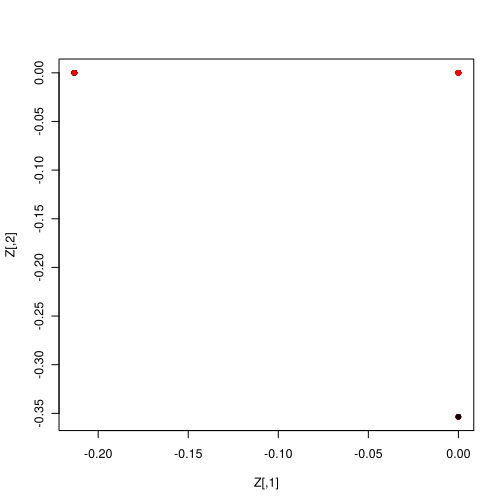

In [42]:
plot(Z, col=obj$classes, pch=20)

Uporabim k-means algoritem.

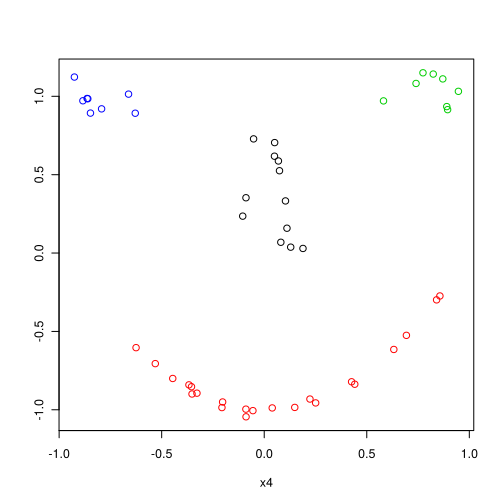

In [43]:
library(stats)
km <- kmeans(Z, centers=k, nstart=5)
plot(my.data, col=km$cluster)